In [1]:
#pip install yahoofinancials # if package is not installed, please uncomment to install
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from yahoofinancials import YahooFinancials

In [2]:
# select asset class, time period, frequancy 
assets = ['IWM', 'AGG', '^IRX']
yahoo_financials = YahooFinancials(assets)
data = yahoo_financials.get_historical_price_data(start_date='2011-01-01', 
                                                  end_date='2021-01-01', 
                                                  time_interval='daily')

In [3]:
# format asset 1
IWM_df = pd.DataFrame(data['IWM']['prices'])
IWM_df = IWM_df.drop('date', axis=1).set_index('formatted_date')
IWM_df['IWM_return'] = IWM_df['adjclose'].pct_change(1)
IWM_df

,high,low,open,close,volume,adjclose,IWM_return
formatted_date,,,,,,,
2011-01-03,80.019997,78.730003,78.940002,79.599998,48878000,68.826828,NaN
2011-01-04,79.900002,77.570000,79.839996,78.419998,77509000,67.806526,-0.014824
2011-01-05,79.360001,78.110001,78.400002,79.339996,47145300,68.602020,0.011732
2011-01-06,79.529999,78.650002,79.400002,78.970001,39392300,68.282089,-0.004664
2011-01-07,79.440002,77.440002,79.239998,78.519997,59486800,67.892990,-0.005698
...,...,...,...,...,...,...,...
2020-12-24,199.940002,198.059998,199.929993,199.009995,8904900,198.636444,-0.000653
2020-12-28,201.179993,198.130005,201.160004,198.270004,27168400,197.897842,-0.003718
2020-12-29,199.000000,193.440002,198.639999,194.429993,33901300,194.065048,-0.019368


In [4]:
# format asset 2
AGG_df = pd.DataFrame(data['AGG']['prices'])
AGG_df = AGG_df.drop('date', axis=1).set_index('formatted_date')
AGG_df['AGG_return'] = AGG_df['adjclose'].pct_change(1)
AGG_df

,high,low,open,close,volume,adjclose,AGG_return
formatted_date,,,,,,,
2011-01-03,105.680000,105.300003,105.400002,105.629997,739700,81.071152,NaN
2011-01-04,105.769997,105.500000,105.680000,105.660004,625500,81.094200,0.000284
2011-01-05,105.360001,104.940002,105.279999,105.150002,864200,80.702759,-0.004827
2011-01-06,105.309998,105.110001,105.309998,105.169998,2032600,80.718124,0.000190
2011-01-07,105.610001,105.180000,105.309998,105.510002,968500,80.979073,0.003233
...,...,...,...,...,...,...,...
2020-12-24,118.050003,117.930000,117.940002,117.989998,2214500,117.247704,0.000933
2020-12-28,118.050003,117.830002,117.970001,118.010002,4567200,117.267578,0.000170
2020-12-29,118.059998,117.919998,118.059998,118.029999,4300100,117.287453,0.000169


In [5]:
# format risk free rate
T3M_df = pd.DataFrame(data['^IRX']['prices'])
T3M_df = T3M_df.drop('date', axis=1).set_index('formatted_date')
T3M_df['Rf'] = T3M_df['adjclose']/100/252
T3M_df = T3M_df.fillna(method='ffill')
T3M_df

,high,low,open,close,volume,adjclose,Rf
formatted_date,,,,,,,
2011-01-03,0.135,0.110,0.135,0.120,0.0,0.120,0.000005
2011-01-04,0.140,0.130,0.135,0.135,0.0,0.135,0.000005
2011-01-05,0.140,0.130,0.130,0.135,0.0,0.135,0.000005
2011-01-06,0.145,0.135,0.135,0.140,0.0,0.140,0.000006
2011-01-07,0.140,0.135,0.140,0.135,0.0,0.135,0.000005
...,...,...,...,...,...,...,...
2020-12-27,0.080,0.075,0.075,0.075,0.0,0.075,0.000003
2020-12-28,0.083,0.078,0.078,0.080,0.0,0.080,0.000003
2020-12-29,0.090,0.090,0.090,0.090,0.0,0.090,0.000004


In [6]:
# construct needed dataframe
D_df = pd.DataFrame(index=IWM_df.index)
D_df['R_IWM'] = IWM_df['IWM_return']
D_df['R_AGG'] = AGG_df['AGG_return']
D_df['XR_IWM'] = IWM_df['IWM_return'] - T3M_df['Rf'] 
D_df['XR_AGG'] = AGG_df['AGG_return'] - T3M_df['Rf']
D_df

,R_IWM,R_AGG,XR_IWM,XR_AGG
formatted_date,,,,
2011-01-03,NaN,NaN,NaN,NaN
2011-01-04,-0.014824,0.000284,-0.014830,0.000279
2011-01-05,0.011732,-0.004827,0.011726,-0.004832
2011-01-06,-0.004664,0.000190,-0.004669,0.000185
2011-01-07,-0.005698,0.003233,-0.005704,0.003227
...,...,...,...,...
2020-12-24,-0.000653,0.000933,-0.000656,0.000930
2020-12-28,-0.003718,0.000170,-0.003722,0.000166
2020-12-29,-0.019368,0.000169,-0.019371,0.000166


In [7]:
# calculate mean and std
stats=pd.DataFrame()
stats["mean"]=D_df.mean()
stats["std"]=D_df.std()
stats['annual mean']=stats["mean"]*252
stats['annual std']=stats["std"]*np.sqrt(252)

# displace results
print("Daily Frequency")
stats

Daily Frequency


,mean,std,annual mean,annual std
R_IWM,0.000510,0.013705,0.128519,0.217554
R_AGG,0.000151,0.002524,0.037933,0.040060
XR_IWM,0.000474,0.013701,0.119362,0.217503
XR_AGG,0.000129,0.002524,0.032434,0.040067


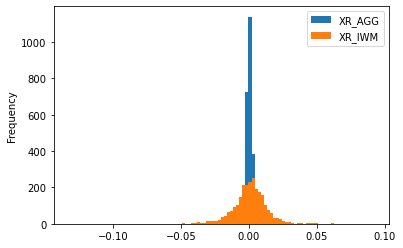

In [8]:
D_df[['XR_AGG','XR_IWM']].plot.hist(bins=100)

In [9]:
# select asset class, time period, frequancy 
assets = ['IWM', 'AGG', '^IRX']
yahoo_financials = YahooFinancials(assets)
data = yahoo_financials.get_historical_price_data(start_date='2011-01-01', 
                                                  end_date='2021-01-01', 
                                                  time_interval='weekly')
# format asset 1
IWM_df = pd.DataFrame(data['IWM']['prices'])
IWM_df = IWM_df.drop('date', axis=1).set_index('formatted_date')
IWM_df['IWM_return'] = IWM_df['adjclose'].pct_change(1)

# format asset 2
AGG_df = pd.DataFrame(data['AGG']['prices'])
AGG_df = AGG_df.drop('date', axis=1).set_index('formatted_date')
AGG_df['AGG_return'] = AGG_df['adjclose'].pct_change(1)

# format risk free rate
T3M_df = pd.DataFrame(data['^IRX']['prices'])
T3M_df = T3M_df.drop('date', axis=1).set_index('formatted_date')
T3M_df['Rf'] = T3M_df['adjclose']/100/52
T3M_df = T3M_df.fillna(method='ffill')

# construct needed dataframe
W_df = pd.DataFrame(index=IWM_df.index)
W_df['R_IWM'] = IWM_df['IWM_return']
W_df['R_AGG'] = AGG_df['AGG_return']
W_df['XR_IWM'] = IWM_df['IWM_return'] - T3M_df['Rf'] 
W_df['XR_AGG'] = AGG_df['AGG_return'] - T3M_df['Rf']

# calculate mean and std
stats=pd.DataFrame()
stats["mean"]=W_df.mean()
stats["std"]=W_df.std()
stats['annual mean']=stats["mean"]*52
stats['annual std']=stats["std"]*np.sqrt(52)

# displace results
print("Weekly Frequency")
stats

Weekly Frequency


,mean,std,annual mean,annual std
R_IWM,0.002482,0.029833,0.129069,0.215130
R_AGG,0.000731,0.005779,0.037988,0.041672
XR_IWM,0.002372,0.029838,0.123342,0.215168
XR_AGG,0.000620,0.005776,0.032261,0.041653


In [10]:
# select asset class, time period, frequancy 
assets = ['IWM', 'AGG', '^IRX']
yahoo_financials = YahooFinancials(assets)
data = yahoo_financials.get_historical_price_data(start_date='2011-01-01', 
                                                  end_date='2021-01-02', 
                                                  time_interval='monthly')
# format asset 1
IWM_df = pd.DataFrame(data['IWM']['prices'])
IWM_df = IWM_df.drop('date', axis=1).set_index('formatted_date')
IWM_df['IWM_return'] = IWM_df['adjclose'].pct_change(1)

# format asset 2
AGG_df = pd.DataFrame(data['AGG']['prices'])
AGG_df = AGG_df.drop('date', axis=1).set_index('formatted_date')
AGG_df['AGG_return'] = AGG_df['adjclose'].pct_change(1)

# format risk free rate
T3M_df = pd.DataFrame(data['^IRX']['prices'])
T3M_df = T3M_df.drop('date', axis=1).set_index('formatted_date')
T3M_df['Rf'] = T3M_df['adjclose']/100/12
T3M_df = T3M_df.fillna(method='ffill')

# construct needed dataframe
M_df = pd.DataFrame(index=IWM_df.index)
M_df['R_IWM'] = IWM_df['IWM_return']
M_df['R_AGG'] = AGG_df['AGG_return']
M_df['XR_IWM'] = IWM_df['IWM_return'] - T3M_df['Rf'] 
M_df['XR_AGG'] = AGG_df['AGG_return'] - T3M_df['Rf']

# calculate mean and std
stats=pd.DataFrame()
stats["mean"]=M_df.mean()
stats["std"]=M_df.std()
stats['annual mean']=stats["mean"]*12
stats['annual std']=stats["std"]*np.sqrt(12)

# displace results
print("Monthly Frequency")
stats

Monthly Frequency


,mean,std,annual mean,annual std
R_IWM,0.010832,0.054847,0.129981,0.189997
R_AGG,0.003072,0.009315,0.036859,0.032267
XR_IWM,0.010356,0.054902,0.124272,0.190186
XR_AGG,0.002596,0.009276,0.031150,0.032133


In [11]:
# select asset class, time period, frequancy 
assets = ['IWM', 'AGG', '^IRX']
yahoo_financials = YahooFinancials(assets)
data = yahoo_financials.get_historical_price_data(start_date='2011-01-01', 
                                                  end_date='2021-01-02', 
                                                  time_interval='monthly')
# filter for quarterly
# add df = df.iloc[::3, :] to each df

# format asset 1
IWM_df = pd.DataFrame(data['IWM']['prices'])
IWM_df = IWM_df.iloc[::3, :]
IWM_df = IWM_df.drop('date', axis=1).set_index('formatted_date')
IWM_df['IWM_return'] = IWM_df['adjclose'].pct_change(1)

# format asset 2
AGG_df = pd.DataFrame(data['AGG']['prices'])
AGG_df = AGG_df.iloc[::3, :]
AGG_df = AGG_df.drop('date', axis=1).set_index('formatted_date')
AGG_df['AGG_return'] = AGG_df['adjclose'].pct_change(1)

# format risk free rate
T3M_df = pd.DataFrame(data['^IRX']['prices'])
T3M_df = T3M_df.iloc[::3, :]
T3M_df = T3M_df.drop('date', axis=1).set_index('formatted_date')
T3M_df['Rf'] = T3M_df['adjclose']/100/4
T3M_df = T3M_df.fillna(method='ffill')

# construct needed dataframe
Q_df = pd.DataFrame(index=IWM_df.index)
Q_df['R_IWM'] = IWM_df['IWM_return']
Q_df['R_AGG'] = AGG_df['AGG_return']
Q_df['XR_IWM'] = IWM_df['IWM_return'] - T3M_df['Rf'] 
Q_df['XR_AGG'] = AGG_df['AGG_return'] - T3M_df['Rf']

# calculate mean and std
stats=pd.DataFrame()
stats["mean"]=Q_df.mean()
stats["std"]=Q_df.std()
stats['annual mean']=stats["mean"]*4
stats['annual std']=stats["std"]*np.sqrt(4)

# displace results
print("Quarterly Frequency")
stats

Quarterly Frequency


,mean,std,annual mean,annual std
R_IWM,0.031546,0.084845,0.126184,0.169691
R_AGG,0.009235,0.015786,0.036939,0.031573
XR_IWM,0.030119,0.085109,0.120475,0.170218
XR_AGG,0.007808,0.015700,0.031230,0.031400


In [12]:
# select asset class, time period, frequancy 
assets = ['IWM', 'AGG', '^IRX']
yahoo_financials = YahooFinancials(assets)
data = yahoo_financials.get_historical_price_data(start_date='2011-01-01', 
                                                  end_date='2021-01-02', 
                                                  time_interval='monthly')
# filter for quarterly
# add df = df.iloc[::12, :] to each df

# format asset 1
IWM_df = pd.DataFrame(data['IWM']['prices'])
IWM_df = IWM_df.iloc[::12, :]
IWM_df = IWM_df.drop('date', axis=1).set_index('formatted_date')
IWM_df['IWM_return'] = IWM_df['adjclose'].pct_change(1)

# format asset 2
AGG_df = pd.DataFrame(data['AGG']['prices'])
AGG_df = AGG_df.iloc[::12, :]
AGG_df = AGG_df.drop('date', axis=1).set_index('formatted_date')
AGG_df['AGG_return'] = AGG_df['adjclose'].pct_change(1)

# format risk free rate
T3M_df = pd.DataFrame(data['^IRX']['prices'])
T3M_df = T3M_df.iloc[::3, :]
T3M_df = T3M_df.drop('date', axis=1).set_index('formatted_date')
T3M_df['Rf'] = T3M_df['adjclose']/100
T3M_df = T3M_df.fillna(method='ffill')

# construct needed dataframe
Y_df = pd.DataFrame(index=IWM_df.index)
Y_df['R_IWM'] = IWM_df['IWM_return']
Y_df['R_AGG'] = AGG_df['AGG_return']
Y_df['XR_IWM'] = IWM_df['IWM_return'] - T3M_df['Rf'] 
Y_df['XR_AGG'] = AGG_df['AGG_return'] - T3M_df['Rf']

# calculate mean and std
stats=pd.DataFrame()
stats["mean"]=Y_df.mean()
stats["std"]=Y_df.std()
stats['annual mean']=stats["mean"]
stats['annual std']=stats["std"]

# displace results
print('Annual Frequency')
stats

Annual Frequency


,mean,std,annual mean,annual std
R_IWM,0.126259,0.145225,0.126259,0.145225
R_AGG,0.037470,0.034618,0.037470,0.034618
XR_IWM,0.119996,0.147908,0.119996,0.147908
XR_AGG,0.031207,0.035189,0.031207,0.035189


In [13]:
# comment consistency
#Typed in Word

In [14]:
# calculate correlation of the entire period (using weekly frequency data)
M_df.corr().loc['XR_IWM', 'XR_AGG'] 

-0.12131822901672765

Calculated annual correlation between excess returns using monthly data from 2011-2020

-0.38108555887392487
-0.26889995842561265
0.3298667154684492
0.24038485968673898
-0.3283798097392818
-0.5260921248372973
-0.6960736596722484
-0.1086112438160712
-0.48196925385025835
0.2595388086378048


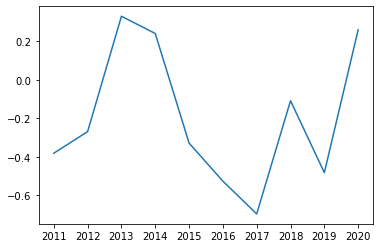

In [15]:
# calculate and plot correlation of subperiod, subperiod is one year (using monthly frequency data)

print('Calculated annual correlation between excess returns using monthly data from 2011-2020\n')

X_df=pd.DataFrame()
X_df['XR_IWM'] = M_df['XR_IWM']
X_df['XR_AGG'] = M_df['XR_AGG'] 

YS = pd.date_range(start='2011-01-01', periods=10, freq='YS').astype(str)
YE = pd.date_range(start='2011-12-31', periods=10, freq='Y').astype(str)
corr = {}
for i, j in zip(YS, YE):
    X_df_sub = X_df[(X_df.index>=i) & (X_df.index<=j)]
    corr[i[:4]] = X_df_sub.corr().loc['XR_IWM', 'XR_AGG']
    print(corr[i[:4]])
    
my_dict = corr
myList = my_dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 
plt.plot(x, y)
plt.show()

In [16]:
# Dealing with time varying correlation
# Typed in word

In [17]:
# manually enter the vol of each etf from previous result
IWM_vol = 0.190531
AGG_vol = 0.032184

# get the weight of each etf
IWM_weight = (1/IWM_vol)/(1/IWM_vol + 1/AGG_vol)
AGG_weight = (1/AGG_vol)/(1/IWM_vol + 1/AGG_vol)

# get financial data
assets = ['IWM', 'AGG', '^IRX']
yahoo_financials = YahooFinancials(assets)
data = yahoo_financials.get_historical_price_data(start_date='2011-01-01', 
                                                  end_date='2021-01-02', 
                                                  time_interval='monthly')
# format asset 1
IWM_df = pd.DataFrame(data['IWM']['prices'])
IWM_df = IWM_df.drop('date', axis=1).set_index('formatted_date')
IWM_df['IWM_return'] = IWM_df['adjclose'].pct_change(1)

# format asset 2
AGG_df = pd.DataFrame(data['AGG']['prices'])
AGG_df = AGG_df.drop('date', axis=1).set_index('formatted_date')
AGG_df['AGG_return'] = AGG_df['adjclose'].pct_change(1)

# format risk free rate
T3M_df = pd.DataFrame(data['^IRX']['prices'])
T3M_df = T3M_df.drop('date', axis=1).set_index('formatted_date')
T3M_df['Rf'] = T3M_df['adjclose']/100/12
T3M_df = T3M_df.fillna(method='ffill')

# construct rebalance date
reBalanceDate = pd.date_range(start='2011-04-01', periods=39, freq='QS')

# construct needed dataframe
df = pd.DataFrame(index=IWM_df.index)
df['IWM'] = IWM_df['adjclose']
df['AGG'] = AGG_df['adjclose']
df['Rf'] = T3M_df['Rf']

# initial number of shares to buy for each etf
IWM_share = IWM_weight/df.loc['2011-01-01','IWM']
AGG_share = AGG_weight/df.loc['2011-01-01','AGG']

# No rebalance portfolio value time series
df['NoRebal'] = df['IWM']*IWM_share+df['AGG']*AGG_share
df['R_NoRebal'] = df['NoRebal'].pct_change(1)
df['XR_NoRebal'] = df['R_NoRebal'] - df['Rf']

#  rebalanced portfolio value time series
df['Rebal_IWM_share']=np.NaN
df['Rebal_AGG_share']=np.NaN
df['Rebal']=np.NaN

IWM_share_re = IWM_share
AGG_share_re = AGG_share

for i in df.index:
    if i in reBalanceDate:
        df.loc[i,'Rebal'] = df.loc[i,'IWM']*IWM_share_re+df.loc[i,'AGG']*AGG_share_re
        IWM_share_re = IWM_weight/df.loc[i,'IWM']*df.loc[i,'Rebal']
        AGG_share_re = AGG_weight/df.loc[i,'AGG']*df.loc[i,'Rebal']
        df.loc[i,'Rebal_IWM_share'] = IWM_share_re
        df.loc[i,'Rebal_AGG_share'] = AGG_share_re
    else:
        df.loc[i,'Rebal_IWM_share'] = IWM_share_re
        df.loc[i,'Rebal_AGG_share'] = AGG_share_re
        df.loc[i,'Rebal'] =  df.loc[i,'IWM']*IWM_share_re+df.loc[i,'AGG']*AGG_share_re

df['R_Rebal'] = df['Rebal'].pct_change(1)
df['XR_Rebal'] = df['R_Rebal']-df['Rf']

df


,IWM,AGG,Rf,NoRebal,R_NoRebal,XR_NoRebal,Rebal_IWM_share,Rebal_AGG_share,Rebal,R_Rebal,XR_Rebal
formatted_date,,,,,,,,,,,
2011-01-01,67.400131,81.094200,0.000121,1.000000,NaN,NaN,0.002144,0.010549,1.000000,NaN,NaN
2011-02-01,71.135490,81.086487,0.000113,1.007927,0.007927,0.007815,0.002144,0.010549,1.007927,0.007927,0.007815
2011-03-01,72.778313,80.929443,0.000075,1.009793,0.001851,0.001776,0.002144,0.010549,1.009793,0.001851,0.001776
2011-04-01,74.853806,82.174980,0.000033,1.027382,0.017419,0.017386,0.001983,0.010696,1.027382,0.017419,0.017386
2011-05-01,73.510818,83.194557,0.000033,1.035259,0.007667,0.007633,0.001983,0.010696,1.035624,0.008022,0.007988
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,148.477798,116.405525,0.000071,1.546345,-0.008387,-0.008458,0.001539,0.011330,1.547372,-0.006279,-0.006350
2020-10-01,152.327301,115.748260,0.000069,1.547664,0.000853,0.000784,0.001466,0.011425,1.545849,-0.000984,-0.001053
2020-11-01,180.118164,117.153595,0.000063,1.622074,0.048079,0.048016,0.001466,0.011425,1.602661,0.036751,0.036689


In [18]:
# calculate mean and std
stats=pd.DataFrame()
stats["mean"]=df.mean()
stats["std"]=df.std()
stats['annual mean']=stats["mean"]*12
stats['annual std']=stats["std"]*np.sqrt(12)
stats = stats.loc[['XR_NoRebal','XR_Rebal'],:]
stats['sharpe'] = stats['annual mean']/stats['annual std']

# displace results
print('Monthly Frequency')
stats

Monthly Frequency


,mean,std,annual mean,annual std,sharpe
XR_NoRebal,0.003879,0.012269,0.046554,0.042501,1.095351
XR_Rebal,0.003670,0.010237,0.044039,0.035463,1.241811


In [19]:
print('Initial weight of IWM is: ')
print(IWM_weight)
print('Initial weight of AGG is: ')
print(AGG_weight)

print('Final weight of IWM of no-rebalance portfolio is: ')
print(df.loc['2021-01-01','IWM']*IWM_share/df.loc['2021-01-01','NoRebal'])
print('Final weight of AGG of no-rebalance portfolio is: ')
print(df.loc['2021-01-01','AGG']*AGG_share/df.loc['2021-01-01','NoRebal'])


Initial weight of IWM is: 
0.1445075544979009
Initial weight of AGG is: 
0.855492445502099
Final weight of IWM of no-rebalance portfolio is: 
0.2634660596152396
Final weight of AGG of no-rebalance portfolio is: 
0.7365339403847604


In [20]:
#  rebalanced portfolio with tansaction cost value time series
df['Rebal_trans']=np.NaN
df['Rebal_IWM_share_trans']=np.NaN
df['Rebal_AGG_share_trans']=np.NaN

IWM_share_re = IWM_share
AGG_share_re = AGG_share

for i in df.index:
    if i in reBalanceDate:
        end_balance = df.loc[i,'IWM']*IWM_share_re+df.loc[i,'AGG']*AGG_share_re
        
        IWM_share_re_new = IWM_weight/df.loc[i,'IWM']*end_balance
        AGG_share_re_new = AGG_weight/df.loc[i,'AGG']*end_balance
        
        trans_cost = (abs(IWM_share_re_new - IWM_share_re)*df.loc[i,'IWM']+abs(AGG_share_re_new - AGG_share_re)*df.loc[i,'AGG'])*0.01
        
        df.loc[i,'Rebal_trans'] = end_balance - trans_cost
        
        df.loc[i,'Rebal_IWM_share_trans'] = IWM_weight/df.loc[i,'IWM']*df.loc[i,'Rebal_trans']
        df.loc[i,'Rebal_AGG_share_trans'] = AGG_weight/df.loc[i,'AGG']*df.loc[i,'Rebal_trans']
        
        IWM_share_re = df.loc[i,'Rebal_IWM_share_trans'] 
        AGG_share_re = df.loc[i,'Rebal_AGG_share_trans'] 
        
    else:
        df.loc[i,'Rebal_IWM_share_trans'] = IWM_share_re
        df.loc[i,'Rebal_AGG_share_trans'] = AGG_share_re
        df.loc[i,'Rebal_trans'] =  df.loc[i,'IWM']*IWM_share_re+df.loc[i,'AGG']*AGG_share_re

df['R_Rebal_trans'] = df['Rebal_trans'].pct_change(1)
df['XR_Rebal_trans'] = df['R_Rebal_trans']-df['Rf']

df

,IWM,AGG,Rf,NoRebal,R_NoRebal,XR_NoRebal,Rebal_IWM_share,Rebal_AGG_share,Rebal,R_Rebal,XR_Rebal,Rebal_trans,Rebal_IWM_share_trans,Rebal_AGG_share_trans,R_Rebal_trans,XR_Rebal_trans
formatted_date,,,,,,,,,,,,,,,,
2011-01-01,67.400131,81.094200,0.000121,1.000000,NaN,NaN,0.002144,0.010549,1.000000,NaN,NaN,1.000000,0.002144,0.010549,NaN,NaN
2011-02-01,71.135490,81.086487,0.000113,1.007927,0.007927,0.007815,0.002144,0.010549,1.007927,0.007927,0.007815,1.007927,0.002144,0.010549,0.007927,0.007815
2011-03-01,72.778313,80.929443,0.000075,1.009793,0.001851,0.001776,0.002144,0.010549,1.009793,0.001851,0.001776,1.009793,0.002144,0.010549,0.001851,0.001776
2011-04-01,74.853806,82.174980,0.000033,1.027382,0.017419,0.017386,0.001983,0.010696,1.027382,0.017419,0.017386,1.027142,0.001983,0.010693,0.017181,0.017147
2011-05-01,73.510818,83.194557,0.000033,1.035259,0.007667,0.007633,0.001983,0.010696,1.035624,0.008022,0.007988,1.035381,0.001983,0.010693,0.008022,0.007988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,148.477798,116.405525,0.000071,1.546345,-0.008387,-0.008458,0.001539,0.011330,1.547372,-0.006279,-0.006350,1.538780,0.001530,0.011267,-0.006279,-0.006350
2020-10-01,152.327301,115.748260,0.000069,1.547664,0.000853,0.000784,0.001466,0.011425,1.545849,-0.000984,-0.001053,1.537046,0.001458,0.011360,-0.001127,-0.001196
2020-11-01,180.118164,117.153595,0.000063,1.622074,0.048079,0.048016,0.001466,0.011425,1.602661,0.036751,0.036689,1.593534,0.001458,0.011360,0.036751,0.036689


In [21]:
# calculate mean and std
stats=pd.DataFrame()
stats["mean"]=df.mean()
stats["std"]=df.std()
stats['annual mean']=stats["mean"]*12
stats['annual std']=stats["std"]*np.sqrt(12)
stats = stats.loc[['XR_NoRebal','XR_Rebal','XR_Rebal_trans'],:]
stats['sharpe'] = stats['annual mean']/stats['annual std']

#displace results
print('Monthly Frequency')
stats

Monthly Frequency


,mean,std,annual mean,annual std,sharpe
XR_NoRebal,0.003879,0.012269,0.046554,0.042501,1.095351
XR_Rebal,0.003670,0.010237,0.044039,0.035463,1.241811
XR_Rebal_trans,0.003622,0.010210,0.043462,0.035369,1.228809


In [22]:
print('Dollar value of incurred transaction cost due to rebalancing: in $USD')
print((df.loc['2021-01-01','Rebal']-df.loc['2021-01-01','Rebal_trans'])*1000000)

Dollar value of incurred transaction cost due to rebalancing: in $USD
9297.848823794919


In [23]:
print('Due to tansaction cost, annual excess return is reduced by: in %')
print((stats.loc['XR_Rebal','annual mean']-stats.loc['XR_Rebal_trans','annual mean'])*100)

Due to tansaction cost, annual excess return is reduced by: in %
0.05765868172146332
